In [10]:
import tensorflow as ts
from tensorflow.keras import models, layers
from keras.models import Sequential
import matplotlib.pyplot as plt

In [12]:
IMAGE_SIZE = 256
BATCH_SIZE  = 32
CHANNELS =3
EPOCHS = 50

In [13]:
dataset = ts.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)
classnames = dataset.class_names

Found 2153 files belonging to 3 classes.


In [5]:
#80 => trianing
#20 => 10% validation, 10% testing

In [9]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [10]:
train_dataset = dataset.take(54)
test_dataset = dataset.skip(54) #remaining 20 percent
valid_size = 0.1
len(dataset)*valid_size
valid_dataset = test_dataset.take(6)
actual_test = test_dataset.skip(6)

In [11]:
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size = ts.data.AUTOTUNE)
valid_dataset = valid_dataset.cache().shuffle(1000).prefetch(buffer_size = ts.data.AUTOTUNE)
test_dataset = test_dataset.cache().shuffle(1000).prefetch(buffer_size = ts.data.AUTOTUNE)

In [12]:
##resizing during prediction (if image supplied during prediction not in desire dimenesion we need to rescale)
resize_and_rescale = ts.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [13]:
data_augmentation = ts.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [14]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes =3

model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

    
model.build(input_shape = input_shape)


C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [15]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(
    optimizer = 'adam',
    loss = ts.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [19]:
history = model.fit(
    train_dataset,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = valid_dataset
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.4919 - loss: 0.9455 - val_accuracy: 0.4479 - val_loss: 0.8433
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.5784 - loss: 0.8285 - val_accuracy: 0.6250 - val_loss: 0.7669
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.7219 - loss: 0.6386 - val_accuracy: 0.8177 - val_loss: 0.4707
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - accuracy: 0.8197 - loss: 0.4359 - val_accuracy: 0.8385 - val_loss: 0.3830
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.8839 - loss: 0.3251 - val_accuracy: 0.7969 - val_loss: 0.4518
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.8803 - loss: 0.3082 - val_accuracy: 0.9219 - val_loss: 0.1892
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.9211 - loss: 0.2248 - val_accuracy: 0.9375 - val_loss: 0.1599
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.8906 - loss: 0.2745 - val_accuracy: 0.8906 - v

In [29]:
scores = model.evaluate(test_dataset)

14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 291ms/step - accuracy: 0.9663 - loss: 0.0808


In [27]:
#testing
import numpy as np
def predict(model, img):
    img_array = ts.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = ts.expand_dims(img_array,0) #create a batch
    prediction = model.predict(img_array)
    predicted_class = classnames[np.argmax(prediction[0])]
    confidence = round (100 * (np.max(prediction[0])),2)
    return predicted_class, confidence
    
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


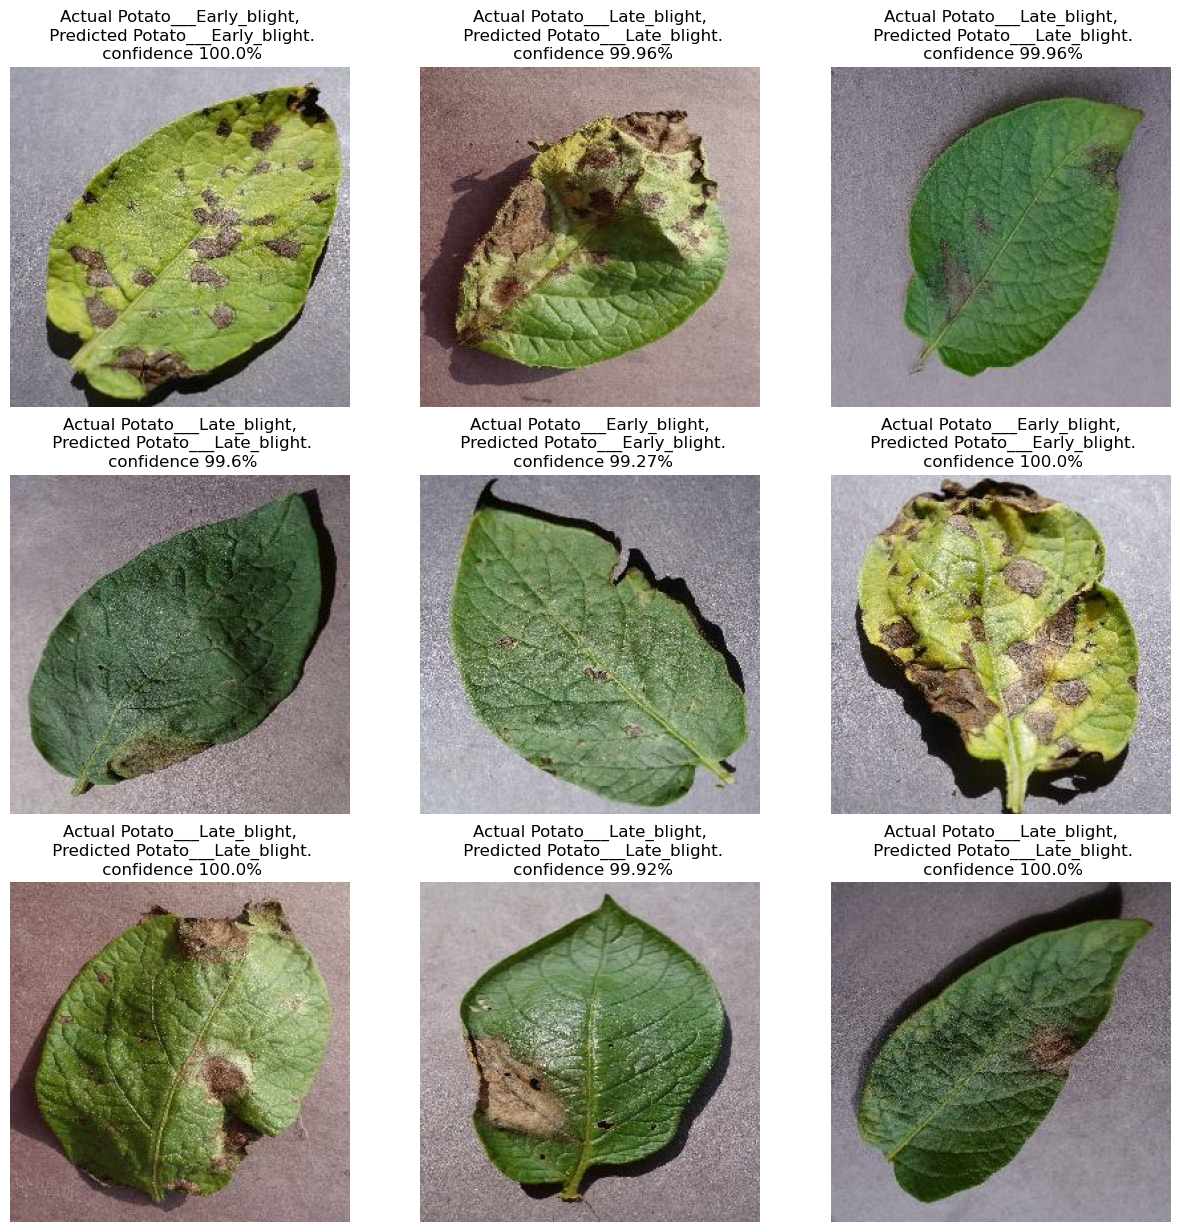

In [28]:
plt.figure(figsize = (15,15))
for images, labels in test_dataset.take(1):
    #taking first 9 images in batch
    for i in range(9):
        ax = plt.subplot(3,3,i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = classnames[labels[i]]
        plt.title(f"Actual {actual_class},\n Predicted {predicted_class}.\n confidence {confidence}%")
        
        plt.axis("off")





In [14]:
from PIL import Image
import numpy as np
from io import BytesIO

# Load image from file path
image_path = 'PlantVillage/Potato___healthy/0f4ebc5a-d646-436a-919d-961342997cde___RS_HL 4183.JPG'  # Replace with your image file path
image = Image.open(image_path)

# Convert image to NumPy array
numpy_array = np.asarray(image)

# Print the array
print(numpy_array)
image_batch = np.expand_dims(numpy_array, 0)
print(image_batch)

prediction = model.predict(image_batch)
predicted_class = classnames[np.argmax(prediction[0])]
confidence = round (100 * (np.max(prediction[0])),2)
print(predicted_class,confidence)

[[[167 150 160]
  [148 131 141]
  [151 134 144]
  ...
  [ 65  59  69]
  [ 64  58  68]
  [ 63  57  67]]

 [[157 140 150]
  [151 134 144]
  [157 140 150]
  ...
  [ 68  62  72]
  [ 64  58  68]
  [ 63  57  67]]

 [[152 135 145]
  [157 140 150]
  [162 145 155]
  ...
  [ 76  68  79]
  [ 74  66  77]
  [ 74  66  77]]

 ...

 [[183 166 172]
  [179 162 168]
  [174 157 163]
  ...
  [158 138 147]
  [157 137 146]
  [161 141 150]]

 [[184 167 173]
  [181 164 170]
  [177 160 166]
  ...
  [160 140 149]
  [161 141 150]
  [165 145 154]]

 [[185 168 174]
  [182 165 171]
  [178 161 167]
  ...
  [158 138 147]
  [156 136 145]
  [159 139 148]]]
[[[[167 150 160]
   [148 131 141]
   [151 134 144]
   ...
   [ 65  59  69]
   [ 64  58  68]
   [ 63  57  67]]

  [[157 140 150]
   [151 134 144]
   [157 140 150]
   ...
   [ 68  62  72]
   [ 64  58  68]
   [ 63  57  67]]

  [[152 135 145]
   [157 140 150]
   [162 145 155]
   ...
   [ 76  68  79]
   [ 74  66  77]
   [ 74  66  77]]

  ...

  [[183 166 172]
   [179 162 1

In [31]:
model.save("../models/2.keras")

In [17]:
from tensorflow import keras
potato = keras.models.load_model("../models/3.keras")
potato

<Sequential name=sequential_2, built=True>

In [18]:
from PIL import Image
import numpy as np
from io import BytesIO

# Load image from file path
image_path = 'PlantVillage/Potato___healthy/0f4ebc5a-d646-436a-919d-961342997cde___RS_HL 4183.JPG'  # Replace with your image file path
image = Image.open(image_path)

# Convert image to NumPy array
numpy_array = np.asarray(image)

# Print the array
print(numpy_array)
image_batch = np.expand_dims(numpy_array, 0)
print(image_batch)

prediction = potato.predict(image_batch)
predicted_class = classnames[np.argmax(prediction[0])]
confidence = round (100 * (np.max(prediction[0])),2)
print(predicted_class,confidence)

[[[167 150 160]
  [148 131 141]
  [151 134 144]
  ...
  [ 65  59  69]
  [ 64  58  68]
  [ 63  57  67]]

 [[157 140 150]
  [151 134 144]
  [157 140 150]
  ...
  [ 68  62  72]
  [ 64  58  68]
  [ 63  57  67]]

 [[152 135 145]
  [157 140 150]
  [162 145 155]
  ...
  [ 76  68  79]
  [ 74  66  77]
  [ 74  66  77]]

 ...

 [[183 166 172]
  [179 162 168]
  [174 157 163]
  ...
  [158 138 147]
  [157 137 146]
  [161 141 150]]

 [[184 167 173]
  [181 164 170]
  [177 160 166]
  ...
  [160 140 149]
  [161 141 150]
  [165 145 154]]

 [[185 168 174]
  [182 165 171]
  [178 161 167]
  ...
  [158 138 147]
  [156 136 145]
  [159 139 148]]]
[[[[167 150 160]
   [148 131 141]
   [151 134 144]
   ...
   [ 65  59  69]
   [ 64  58  68]
   [ 63  57  67]]

  [[157 140 150]
   [151 134 144]
   [157 140 150]
   ...
   [ 68  62  72]
   [ 64  58  68]
   [ 63  57  67]]

  [[152 135 145]
   [157 140 150]
   [162 145 155]
   ...
   [ 76  68  79]
   [ 74  66  77]
   [ 74  66  77]]

  ...

  [[183 166 172]
   [179 162 1